<a href="https://colab.research.google.com/github/carolinabasile/ProblemSet1_MachineLearning/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Set 1 - Machine Learning - UNLP

## Obtención y limpieza de los datos



In [1]:
# Importamos las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Armamos una lista para almacenar todos los datos
data = []

# Base URL de las páginas
base_url = 'https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_{}.html'

# Iteramos sobre las 10 páginas
for i in range(1, 11):

    # Construimos la URL de la página actual
    url = base_url.format(i)

    # Enviamos solicitud HTTP
    response = requests.get(url)
    print(f"Scraping página {i}: {response}")  # Confirmar que la solicitud es exitosa (<Response [200]>)

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla en la página
    table = soup.find('table')

    # Extraemos encabezados (solo en la primera iteración)
    if i == 1:  # Tomar encabezados solo de la primera página
        headers = []
        for header in table.find_all('th'):
            headers.append(header.text.strip())

    # Extraemos filas de datos
    for row in table.find_all('tr'):
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text.strip())
        if row_data:  # Agregar solo filas con datos
            data.append(row_data)

# Convertimos los datos consolidados en un DataFrame
df = pd.DataFrame(data, columns=headers)

df

Scraping página 1: <Response [200]>
Scraping página 2: <Response [200]>
Scraping página 3: <Response [200]>
Scraping página 4: <Response [200]>
Scraping página 5: <Response [200]>
Scraping página 6: <Response [200]>
Scraping página 7: <Response [200]>
Scraping página 8: <Response [200]>
Scraping página 9: <Response [200]>
Scraping página 10: <Response [200]>


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [36]:
# Obtengo el nombre de todas las variables disponibles
variables = df.columns.tolist()

print(variables)

# Restringimos a individuos empleados mayores de 18 años (HAY QUE REVISAR SI P6240 ES LA CORRECTA)
df_limpio = df[(df['age'].astype(float) > 18) & (df['ocu'] == '1')]

print(f"Número de registros después del filtro (empleados mayores de 18 años): {len(df_limpio)}")

['', 'directorio', 'secuencia_p', 'orden', 'clase', 'dominio', 'mes', 'estrato1', 'sex', 'age', 'p6050', 'p6090', 'p6100', 'p6210', 'p6210s1', 'p6240', 'oficio', 'p6426', 'relab', 'p6500', 'p6510', 'p6510s1', 'p6510s2', 'p6545', 'p6545s1', 'p6545s2', 'p6580', 'p6580s1', 'p6580s2', 'p6585s1', 'p6585s1a1', 'p6585s1a2', 'p6585s2', 'p6585s2a1', 'p6585s2a2', 'p6585s3', 'p6585s3a1', 'p6585s3a2', 'p6585s4', 'p6585s4a1', 'p6585s4a2', 'p6590', 'p6590s1', 'p6600', 'p6600s1', 'p6610', 'p6610s1', 'p6620', 'p6620s1', 'p6630s1', 'p6630s1a1', 'p6630s2', 'p6630s2a1', 'p6630s3', 'p6630s3a1', 'p6630s4', 'p6630s4a1', 'p6630s6', 'p6630s6a1', 'p6750', 'p6760', 'p550', 'hoursWorkUsual', 'p6870', 'p6920', 'p7040', 'hoursWorkActualSecondJob', 'p7050', 'p7070', 'p7090', 'p7110', 'p7120', 'p7140s1', 'p7140s2', 'p7150', 'p7160', 'p7310', 'p7350', 'p7422', 'p7422s1', 'p7472', 'p7472s1', 'p7495', 'p7500s1', 'p7500s1a1', 'p7500s2', 'p7500s2a1', 'p7500s3', 'p7500s3a1', 'p7505', 'p7510s1', 'p7510s1a1', 'p7510s2', 'p7

In [4]:
# Primer approach para describir los datos

print("Información del DataFrame:")
print(df_limpio.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 13993 entries, 1 to 32172
Columns: 178 entries,  to y_total_m_ha
dtypes: object(178)
memory usage: 19.1+ MB
None


In [25]:
# Convierto algunas variables de interes a formato numerico
wage_hours_related_vars = ['p6500', 'p7070', 'hoursWorkUsual', 'hoursWorkActualSecondJob',
                           'y_salary_m', 'y_salary_m_hu', 'y_ingLab_m', 'y_ingLab_m_ha']

for col in wage_hours_related_vars:

    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
    print(f"{col} dtype: {df_limpio[col].dtype}")

# Calcular 'hour_wage' teniendo en cuenta los valores NaN
df_limpio['hour_wage'] = (df_limpio['p6500'].fillna(0) + df_limpio['p7070'].fillna(0)) / \
                                         (df_limpio['hoursWorkActualSecondJob'].fillna(0) + df_limpio['hoursWorkUsual'].fillna(0))

# Ajustar para casos donde el denominador es cero (para evitar divisiones por cero)
df_limpio.loc[(df_limpio['hoursWorkActualSecondJob'].fillna(0) + df_limpio['hoursWorkUsual'].fillna(0)) == 0, 'hour_wage'] = np.nan

# Ajustar para casos donde ambos, p6500 y p7070, son NaN
df_limpio.loc[df_limpio['p6500'].isna() & df_limpio['p7070'].isna(), 'hour_wage'] = np.nan

# Ajustar para casos donde ambos, hoursWorkActualSecondJob y hoursWorkUsual, son NaN
df_limpio.loc[df_limpio['hoursWorkActualSecondJob'].isna() & df_limpio['hoursWorkUsual'].isna(), 'hour_wage'] = np.nan

wage_hours_related_vars = wage_hours_related_vars + ['hour_wage']

p6500 dtype: float64
p7070 dtype: float64
hoursWorkUsual dtype: int64
hoursWorkActualSecondJob dtype: float64
y_salary_m dtype: float64
y_salary_m_hu dtype: float64
y_ingLab_m dtype: float64
y_ingLab_m_ha dtype: float64


<ipython-input-25-420681146894>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
<ipython-input-25-420681146894>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['hour_wage'] = (df_limpio['p6500'].fillna(0) + df_limpio['p7070'].fillna(0)) / \


# Estudio de los datos

In [30]:
# Observo y comparo las variables del salario horario ya creadas con la que acabamos de crear

selected_columns = ['p6500', 'p7070', 'hoursWorkActualSecondJob', 'hoursWorkUsual', 'hour_wage',
                    'totalHoursWorked', 'y_salary_m', 'y_salary_m_hu', 'y_ingLab_m', 'y_ingLab_m_ha']
subset_df = df_limpio[selected_columns]
subset_df.head()

,p6500,p7070,hoursWorkActualSecondJob,hoursWorkUsual,hour_wage,totalHoursWorked,y_salary_m,y_salary_m_hu,y_ingLab_m,y_ingLab_m_ha
1,"1,300,000.00",0.00,NaN,45,"28,888.89",45,"1,300,000.00","6,740.74","1,620,833.25","8,404.32"
8,"1,200,000.00",0.00,NaN,48,"25,000.00",48,"1,200,000.00","5,833.33","1,378,973.38","6,703.34"
13,"737,717.00",0.00,NaN,56,"13,173.52",56,"737,717.00","3,073.82","883,357.00","3,680.65"
15,"700,000.00",0.00,NaN,40,"17,500.00",40,"700,000.00","4,083.33","700,000.00","4,083.33"
22,"950,000.00",0.00,NaN,40,"23,750.00",40,"950,000.00","5,541.67","1,083,000.00","6,317.50"


No resulta claro que variables se utilizaron para calcular el salario horario del empleo principal ni el salario horario total ya que se obtienen valores muy distintos a los que resultan de sumar los ingresos salariales de los empleos y dividirlos por las horas totales de trabajo.

In [27]:
# Estadisticos descriptivos para variables de interes
pd.set_option('display.float_format', '{:,.2f}'.format)

for col in wage_hours_related_vars:

  print("\nEstadísticas descriptivas para variables de interes:")
  print(df_limpio[col].describe())

  zero_count = (df_limpio[col] == 0).sum()
  na_count = df_limpio[col].isna().sum()
  print(f"Number of zeros in '{col}': {zero_count}")
  print(f"Number of missing values (NA) in '{col}': {na_count}")


Estadísticas descriptivas para variables de interes:
count        9,474.00
mean     1,516,954.33
std      2,164,692.61
min              0.00
25%        781,242.00
50%        900,000.00
75%      1,400,000.00
max     34,000,000.00
Name: p6500, dtype: float64
Number of zeros in 'p6500': 585
Number of missing values (NA) in 'p6500': 4519

Estadísticas descriptivas para variables de interes:
count       13,973.00
mean        20,235.02
std        232,115.48
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     10,000,000.00
Name: p7070, dtype: float64
Number of zeros in 'p7070': 13611
Number of missing values (NA) in 'p7070': 20

Estadísticas descriptivas para variables de interes:
count   13,993.00
mean        50.14
std         12.63
min          1.00
25%         45.00
50%         48.00
75%         50.00
max        130.00
Name: hoursWorkUsual, dtype: float64
Number of zeros in 'hoursWorkUsual': 0
Number of missing values (NA) in 'hoursWorkUsual': 0

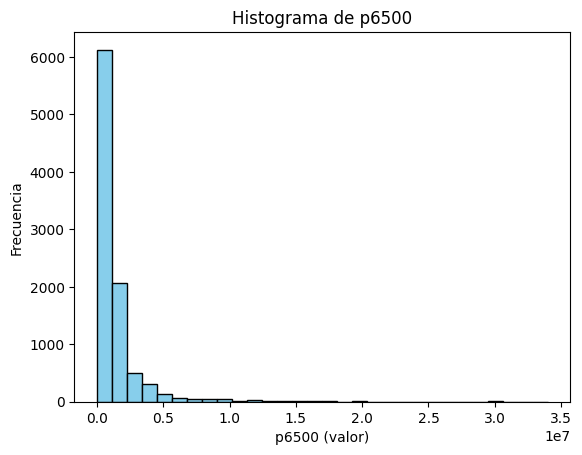

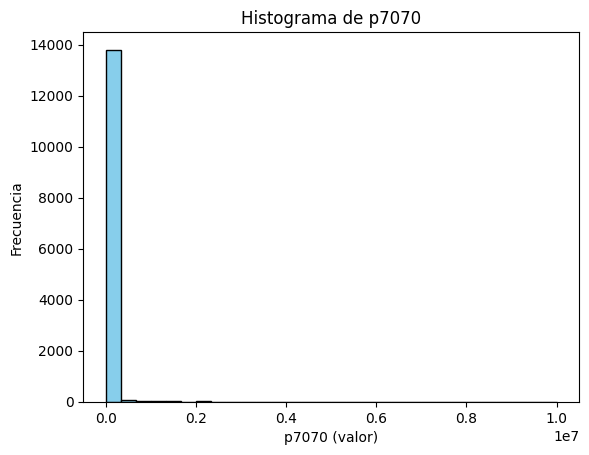

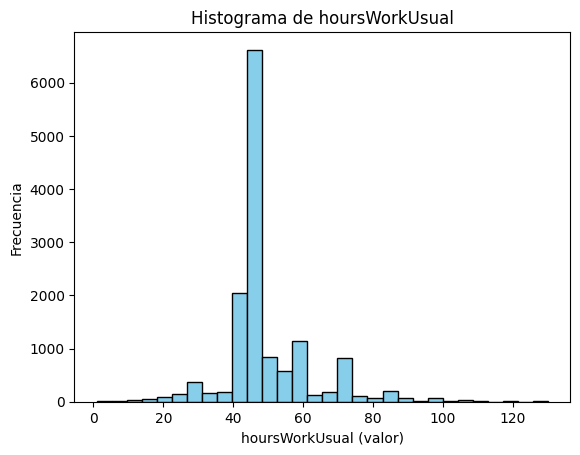

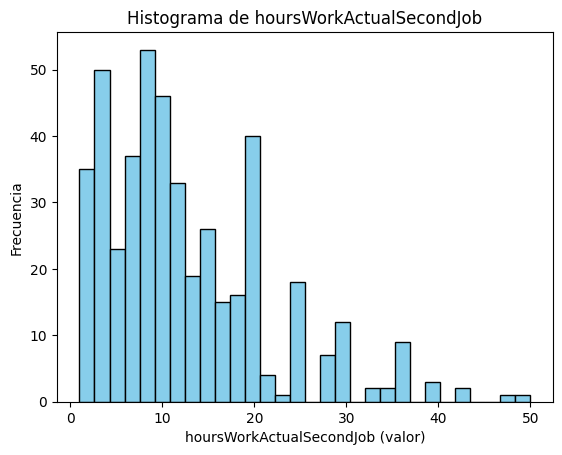

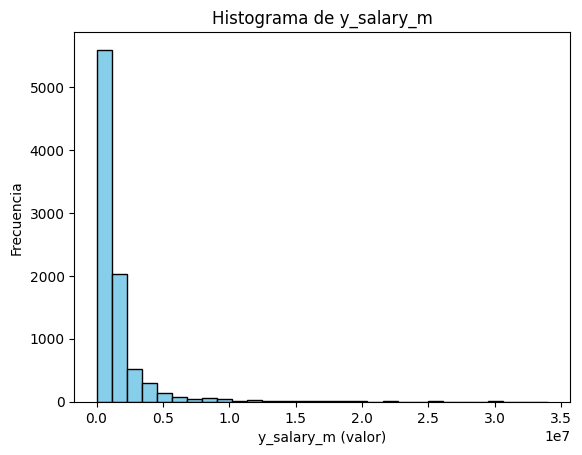

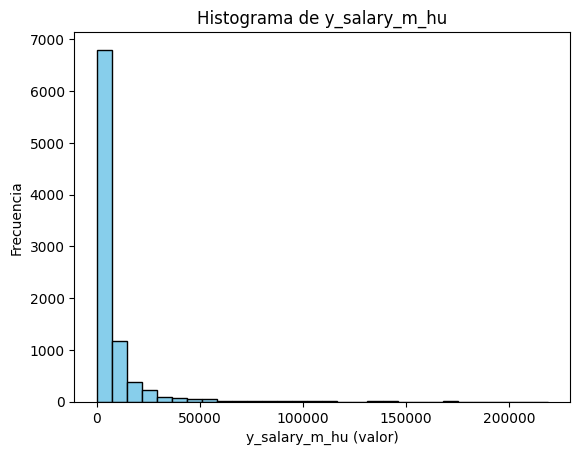

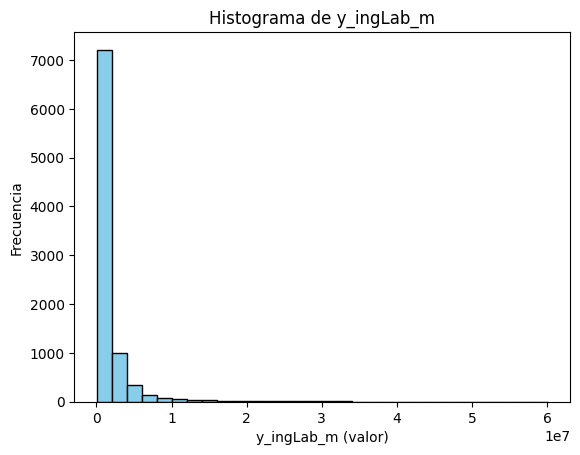

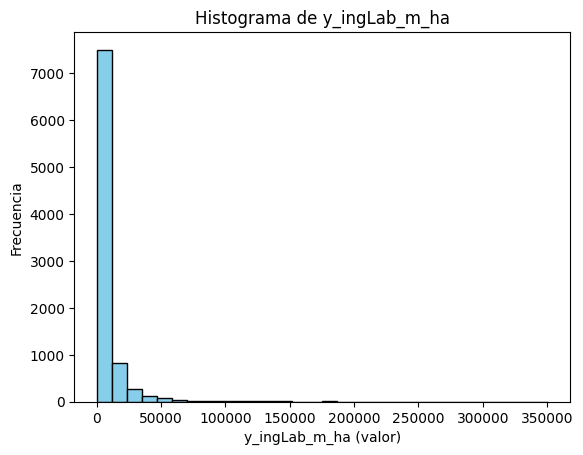

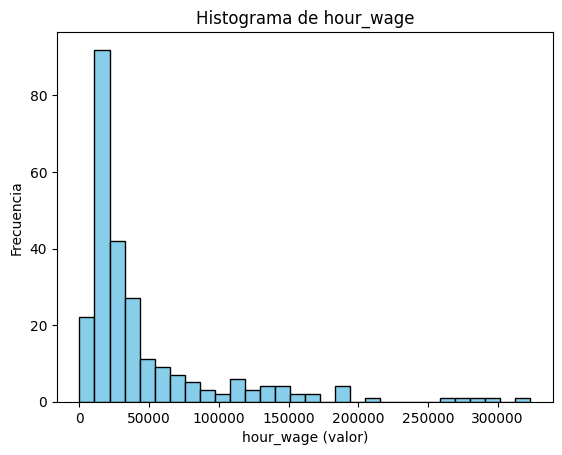

In [8]:
# Histogramas del salario horario

for col in wage_hours_related_vars:
    data = df_limpio[col].dropna()

    # Plot histogram of the variable
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(f'{col} (valor)')
    plt.ylabel('Frecuencia')
    plt.show()


Decidimos trabajar con la variable hour_wage, la cual se crea sumando el ingreso salarial de la ocupacion principal y, en caso de que exista, de la secundaria y dividiendolo por las horas de trabajo totales. Mas aun, se desea contar con casos de ingresos salariales nulos ya que estos puedene estar asociados a ingresos que provienen de otras fuentes.

Se excluyen las horas extra y los ingresos asociados a ellas por la potencial asociacion a factores ocacionales.

In [37]:
#age
#clase	=1 urban; =0 rural
#depto	Departamento
#informal	=1 if informal (social security); =0 otherwise
#microEmpresa	=1 if 5 workers or less in firm; =0 otherwise; incluye cuenta propia
#ocu	=1 occupied; =0 otherwise
#p6426	¿cuanto tiempo lleva ... Trabajando en esta empresa, negocio, industria, oficina
#sex	=1 male, =0 female
#sizeFirm	size of the firm by categories

#p6020 sexo
#p6210 -- maximo nivel ed alcanzo
#dpto departamento / area maybe
#p6440 contrato laboral
#p6426 antiguedad
#rama2d -- actividad

# Definir un único conjunto de variables para analizar
variables = ["hour_wage", "age", "clase", "depto", "informal", "microEmpresa",
             "p6426", "sex", "sizeFirm","p6210"]

# Seleccionar las columnas correspondientes del DataFrame
subset = df_limpio[variables]

# Calcular y mostrar la matriz de correlación
corr_matrix = subset.corr()
print("Matriz de correlación:")
print(corr_matrix, "\n")

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación")
plt.show()

KeyError: "['hour_wage'] not in index"

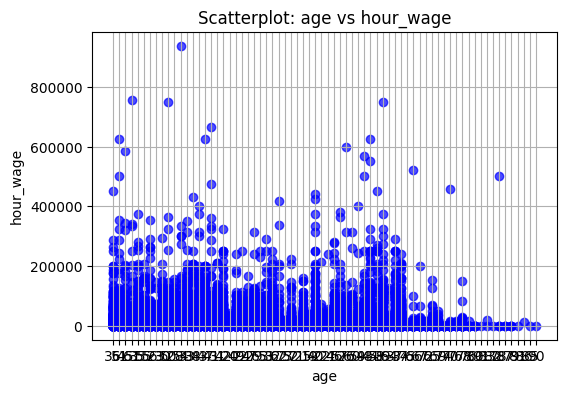

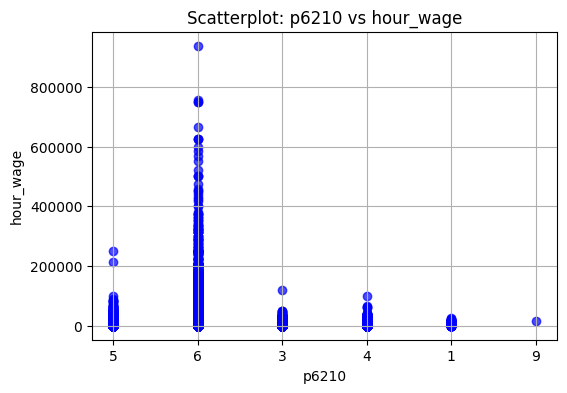

In [34]:

# Definir las variables independientes y la dependiente
variables_independientes = [ "age", "clase", "depto", "informal", "microEmpresa",
                             "p6426", "sex", "sizeFirm","p6210"]

variable_dependiente = "hour_wage"

# Crear scatterplots entre hour_wage y cada variable independiente
for var in variables_independientes:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_limpio[var], df_limpio[variable_dependiente], alpha=0.7, color='b')
    plt.title(f"Scatterplot: {var} vs {variable_dependiente}")
    plt.xlabel(var)
    plt.ylabel(variable_dependiente)
    plt.grid(True)
    plt.show()


In [ ]:
X = df_limpio[[ "age", "black", "hispanic", "other", "exp", "afqt", "mom_educ", "dad_educ"]]

y=df_limpio[["hour_wage"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

we can check that the partition:

In [ ]:
X_train.head()

In [ ]:
age
p6020 sexo
p6210 -- maximo nivel ed alcanzo
dpto departamento / area maybe
p6440 contrato laboral
p6426 antiguedad
rama2d -- actividad